# Visualization of training and test curves with different optimizers
This notebook is modified from https://github.com/Luolc/AdaBound/blob/master/demos/cifar10/visualization.ipynb.
We compare the performace of AdaBelief optimizer and 2 other optimizers (SGDM,and Adam).

In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)

ModuleNotFoundError: No module named 'torch'

In [5]:
def get_data(names):
    folder_path = './curve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(80,101), loc = 'upper left'):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_acc'.format(curve_type.lower())])
        if label == 'AdaBelief':
            plt.plot(acc, '-', label=label)
        else:
            plt.plot(acc, '--',label = label)
    
    plt.grid()
    plt.legend(fontsize=14, loc=loc)
    plt.title('{} accuracy ~ Training epoch'.format(curve_type))
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.show()

## VGG Network

<IPython.core.display.Javascript object>


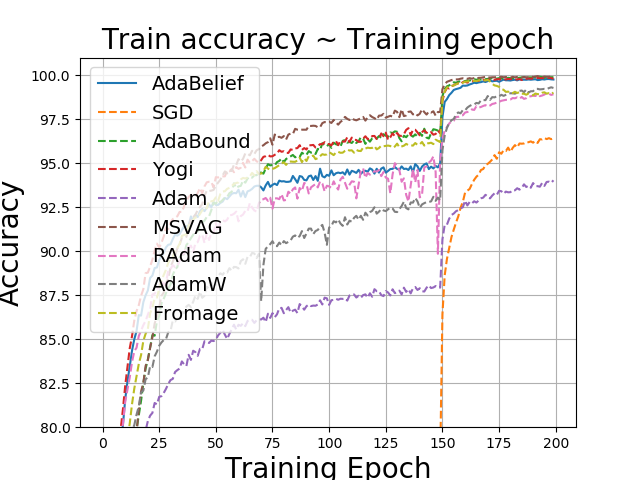

<IPython.core.display.Javascript object>


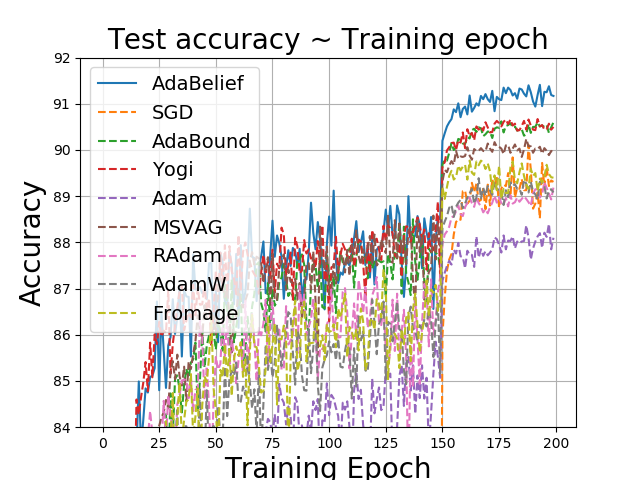

In [50]:
names = ['vgg-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'vgg-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse']
labels = ['AdaBelief',
          'SGD',
          'Adam']
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (84,92))     